# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | island harbour
City not found. Skipping...
Processing Record 2 of Set 1 | sandnessjoen
City not found. Skipping...
Processing Record 3 of Set 1 | toga village
City not found. Skipping...
Processing Record 4 of Set 1 | callao
City not found. Skipping...
Processing Record 5 of Set 1 | egersund
City not found. Skipping...
Processing Record 6 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 7 of Set 1 | margaret river
City not found. Skipping...
Processing Record 8 of Set 1 | lompoc
City not found. Skipping...
Processing Record 9 of Set 1 | whitehorse
City not found. Skipping...
Processing Record 10 of Set 1 | yeppoon
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 12 of Set 1 | olyokminsk
City not found. Skipping...
Processing Record 13 of Set 1 | codrington
City not found. Skipping...
Proces

In [72]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [73]:
# Display sample data
city_data_df.head()

""


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\ashle\python-api-challenge\WeatherPy\cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\ashle\python-api-challenge\WeatherPy\cities.csv", index_col ="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

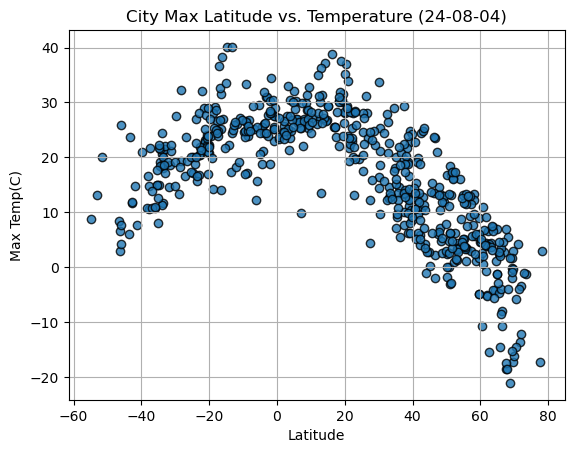

In [83]:
import time

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'], edgecolor="black", 
            linewidth= 1, 
            marker="o",
            alpha=0.8, label='cities')

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')

plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ashle\python-api-challenge\WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

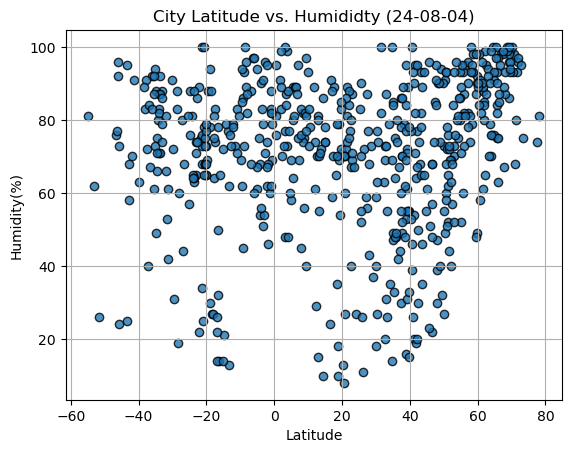

In [84]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
           city_data_df['Humidity'],edgecolor='black',
            linewidth=1,
            marker='o',
            alpha=0.8,label='cities')

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')

plt.title(f"City Latitude vs. Humididty ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ashle\python-api-challenge\WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

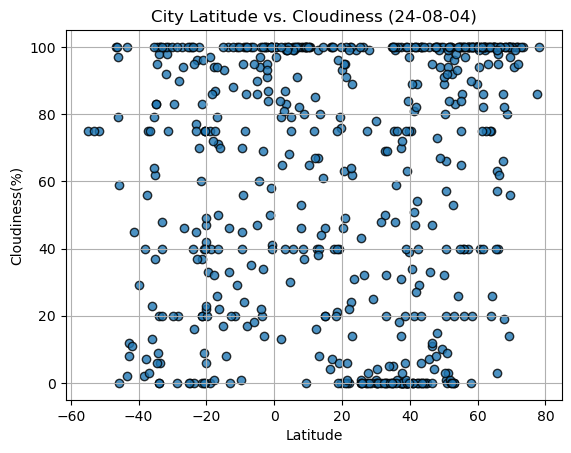

In [85]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
           city_data_df['Cloudiness'],edgecolor='black',
            linewidth=1,
            marker='o',
            alpha=0.8,label='cities')

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')

plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ashle\python-api-challenge\WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

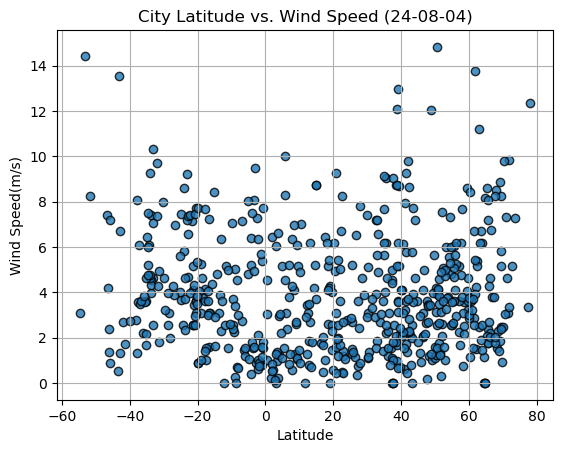

In [87]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
           city_data_df['Wind Speed'],edgecolor='black',
            linewidth=1,
            marker='o',
            alpha=0.8,label='cities')

# Incorporate the other graph properties
date = time.strftime('%y-%m-%d')

plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ashle\python-api-challenge\WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x +{round(intercept,2)}"

    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, 'r-')
    plt.annotate(line_eq, text_coord, fontsize=15, color = 'r')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue ** 2}")
    plt.show()

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434125


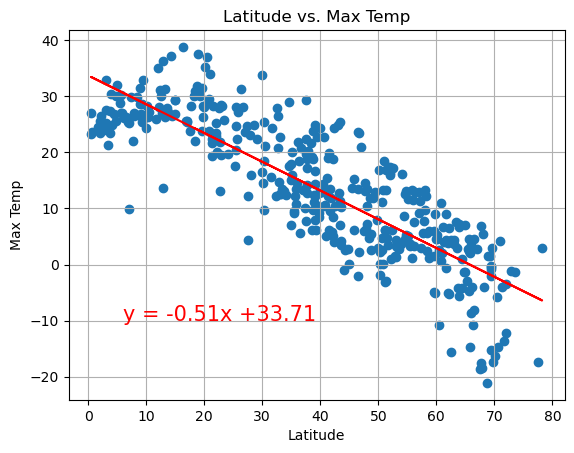

In [113]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Max Temp")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp', (6, -10))

The r-value is: 0.4121057168607252


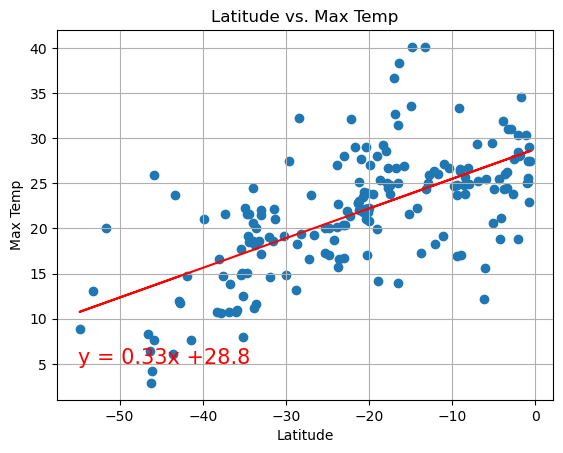

In [114]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Max Temp")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:**

The max temperature appears to show a strong negative linear relationship with latitudes in the Northern Hemisphere, with an approximate r-value of -0.72 for the linear best-fit regression line.

The max temperature appears to show a strong positive linear relationship with latitudes in the Southern Hemisphere, with an approximate r-value of 0.41 for the linear best-fit regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


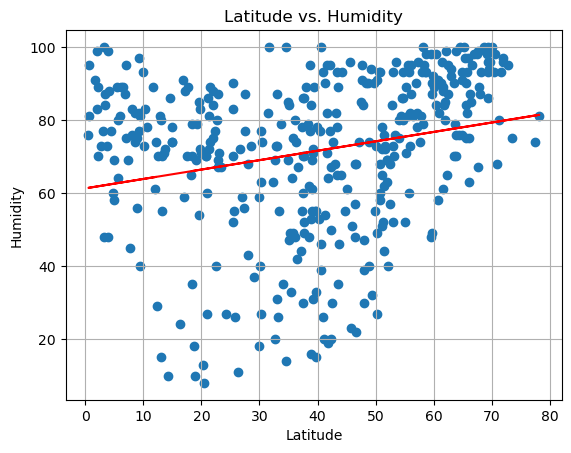

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title(f"Latitude vs. Humidity")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is: 0.4121057168607252


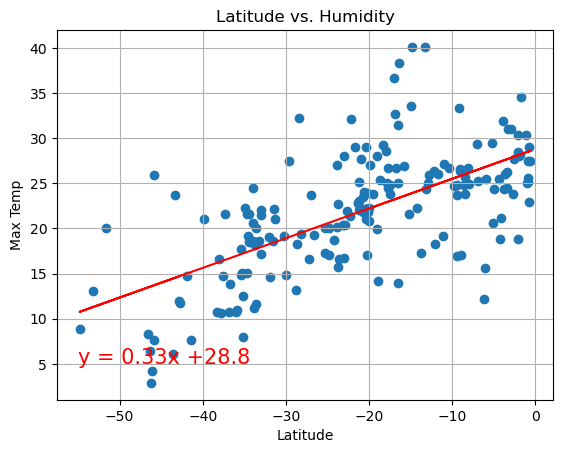

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Humidity")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** 

The humidity shows a slight positive linear relationship with latitudes in the Northern Hempisphere, with an approximate r-value of 0.06.

The humidity shows a more drastic positive linear relationship with latitudes in the Southern Hemisphere, with an approximate r-value of 0.41.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


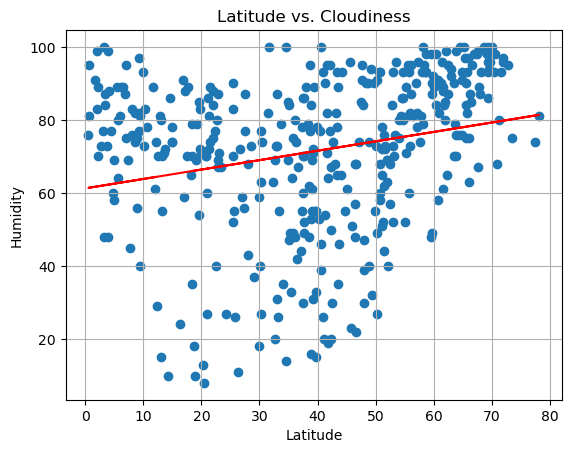

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title(f"Latitude vs. Cloudiness")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is: 0.4121057168607252


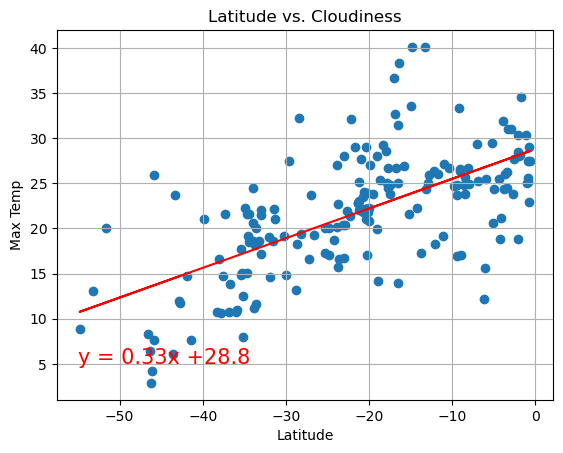

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Cloudiness")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** 

There is not a strong relationship between cloudiness and latitude in the Northern Hemisphere; however, we see a very strong positive relationship between cloudiness and latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


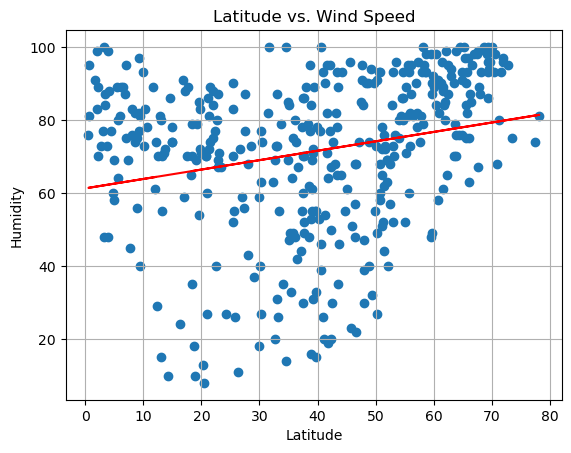

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title(f"Latitude vs. Wind Speed")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Humidity',(6, -10))

The r-value is: 0.4121057168607252


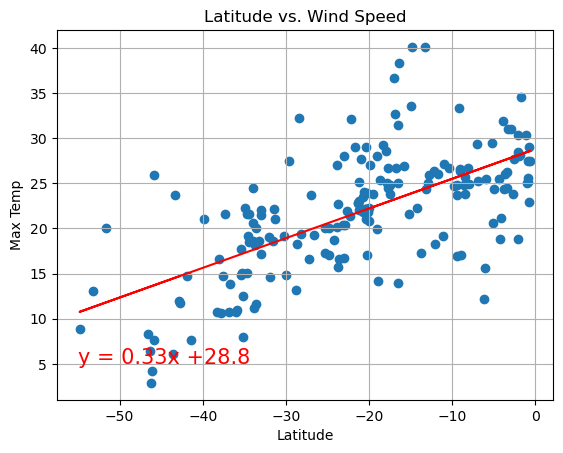

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title(f"Latitude vs. Wind Speed")
plt.grid(True)
plot_linear_regression(x_values, y_values, 'Max Temp',(-55, 5))

**Discussion about the linear relationship:** 

There is not a strong relationship between cloudiness and latitude in the Northern Hemisphere; however, we see a very strong positive relationship between cloudiness and latitude in the Southern Hemisphere.